In [2]:
import pandas as pd
from sklearn import linear_model, tree, neural_network
import numpy as np
import random
import os
import copy
import math
from matplotlib import pyplot as plt
from datetime import datetime
from itertools import combinations


In [3]:
#Import the data set and remove the rows with missing values
car_data = pd.read_table('datasets/car/car-original.data', header=None, delim_whitespace=True)
df = car_data.apply (pd.to_numeric, errors='coerce')
print(df)
clean_data = df = df.dropna()
clean_data.reset_index(drop=True)
npdata = clean_data.to_numpy()


        0    1      2      3       4     5     6    7
0    18.0  8.0  307.0  130.0  3504.0  12.0  70.0  1.0
1    15.0  8.0  350.0  165.0  3693.0  11.5  70.0  1.0
2    18.0  8.0  318.0  150.0  3436.0  11.0  70.0  1.0
3    16.0  8.0  304.0  150.0  3433.0  12.0  70.0  1.0
4    17.0  8.0  302.0  140.0  3449.0  10.5  70.0  1.0
..    ...  ...    ...    ...     ...   ...   ...  ...
387  27.0  4.0  140.0   86.0  2790.0  15.6  82.0  1.0
388  44.0  4.0   97.0   52.0  2130.0  24.6  82.0  2.0
389  32.0  4.0  135.0   84.0  2295.0  11.6  82.0  1.0
390  28.0  4.0  120.0   79.0  2625.0  18.6  82.0  1.0
391  31.0  4.0  119.0   82.0  2720.0  19.4  82.0  1.0

[392 rows x 8 columns]


In [18]:
# print(npdata)

In [4]:
#define the test indices and define the test data. This data remains untouched
random.seed(50)
test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,math.ceil(0.2*npdata.shape[0]))]))
# print(test_indices)
test_data = npdata[test_indices, :]
test_X = test_data[:,1:]
real_mpg = test_data[:, 0]



#set up iteration variables and parameters
mu = 0
# displacement = 1st column, hp = 2nd column, weight = 3rd column, acceleration = 4th column
features = [[2], [3], [4], [2,3], [2,4], [3,4], [2,3,4]] 
input_variances = np.arange(0,200,5)
iterations = 100


#set up arrays for the results of the models
results = np.zeros([iterations, test_X.shape[0]])
output_variances = np.zeros(input_variances.size)
plot_matrix = np.zeros([len(features), input_variances.size])

for j in range(0, len(features)):
    k = 0
    for sig in input_variances:
        rng = np.random.default_rng(12345)
        for i in range(0, iterations):
            data = copy.deepcopy(npdata)
            training_data = np.delete(data, test_indices, axis=0)
            rows = training_data.shape[0]
            noise_indices = rng.choice(rows-1, math.ceil(0.1*rows), replace=False)
            for el in features[j]:
                noises = rng.normal(mu, sig, noise_indices.shape)
                training_data[noise_indices, el] += noises
            training_X = training_data[:, 1:]
            training_y = training_data[:, 0]
            ######################################################### LINEAR REGRESSION
            clf = linear_model.LinearRegression()
            ######################################################### DECISION TREE
            # clf = tree.DecisionTreeRegressor(random_state=42)
            ######################################################### NEURAL NET
            # clf = neural_network.MLPRegressor(random_state=42, max_iter=100)
            #########################################################
            clf = clf.fit(training_X, training_y)
            prediction_mpg = clf.predict(test_X)
            results[i] = prediction_mpg
        variances = np.array([np.var(results[:, k]) for k in range(0, results.shape[1])])
        mean_output_variance = np.mean(variances)
        print(mean_output_variance)
        output_variances[k] = mean_output_variance
        plot_matrix[j] = output_variances
        k += 1
# print(output_variances)
print("done")

4.173791334896626e-29
0.0001776041623454507
0.0006845277317046922
0.0014587097903881535
0.002417576607285998
0.0034718881790960104
0.004537988811093515
0.005546560890725865
0.006447179293799634
0.007208994451496898
0.007818568392525439
0.008276141866608156
0.008591471933952589
0.008780024871900277
0.008859925078027655
0.008849761282584166
0.00876717030430249
0.008628038703369933
0.008446149445514303
0.00823312210225648
0.007998528989939163
0.0077501035133016654
0.007493985306876299
0.007234968131995468
0.006976731455378344
0.00672204649898995
0.006472953674749165
0.006230911865250426
0.00599692187285854
0.005771627169489832
0.005555395268740254
0.005348382890711343
0.005150587772593273
0.004961889599115127
0.004782082145289922
0.004610898369972254
0.004448029886164901
0.004293141966378583
0.00414588501707763
0.0040059032711440585
4.173791334896626e-29
0.0003975428910792319
0.0014575323329601825
0.002847191285917814
0.004212448126211547
0.005316372439380403
0.006067947299541288
0.006480

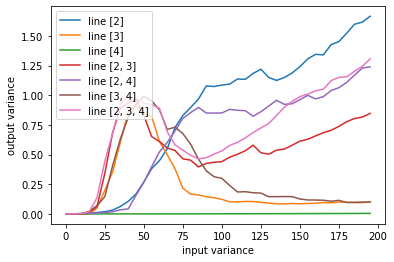

In [20]:
now = datetime.now()
timestamp = datetime.timestamp(now)
#Plot the outcomes
t=0
for arr in plot_matrix:
    plt.plot(input_variances, arr, label="line " + str(features[t]))
    t+=1
plt.xlabel('input variance')
plt.ylabel('output variance')
plt.legend()
plt.savefig('linear regression experiment'+ str(timestamp) + '.png')
plt.show()

In [ ]:
now = datetime.now()
timestamp = datetime.timestamp(now)

